# LangChain Cookbook 👨‍🍳👩‍🍳

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!pip install quandl

In [15]:
import os
os.getcwd()

'/content/drive/My Drive/trading-momentum-transformer/trading-momentum-transformer'

In [16]:
# 필요한 패키지 설치
!pip install git-python==1.0.3

In [18]:
# Clone 명령어를 생성하고 실행
import git
import os

repo_url = "https://github.com/abeliansw/trading-momentum-transformer"


# 가져올 Github Repository의 이름
repo_name = repo_url.split("/")[-1]

# 가져올 Github Repository의 파일 경로(최상위 경로로 설정)
content_path = f'/content/drive/MyDrive/{repo_name}'

if os.path.exists(content_path):
    print("이미 해당 이름으로 구글 드라이브에 저장된 repo가 있습니다.")
else:
    # 새로운 directory 생성
    os.makedirs(content_path)

    # clone Github Repository
    git.Git(content_path).clone(repo_url)

이미 해당 이름으로 구글 드라이브에 저장된 repo가 있습니다.


In [19]:
import os

working_directory = content_path + '/' + 'trading-momentum-transformer'
os.chdir(working_directory)  # 작업 디렉토리 변경

os.getcwd()



'/content/drive/MyDrive/trading-momentum-transformer/trading-momentum-transformer'

In [20]:
import quandl
from settings.default import ALL_QUANDL_CODES
import datetime as dt
import argparse
import os

DEPTH = 1

def main():
    #quandl.ApiConfig.api_key = api_key
    quandl.ApiConfig.api_key = 'jKzo_p2V4287sPcWbVX5'
    if not os.path.exists(os.path.join("data", "quandl")):
        os.mkdir(os.path.join("data", "quandl"))

    for t in ALL_QUANDL_CODES:
        print(t)
        try:
            data = quandl.get(
                f"{t}{DEPTH}",
                start_date="1988-01-01",
            )
        except BaseException as ex:
            print(ex)
        if ("Settle" in data.columns) and (data.index.min() <= dt.datetime(2015, 1, 1)):
            data[["Settle"]].to_csv(
                os.path.join("data", "quandl", f"{t.split('/')[-1]}.csv")
            )


main()
print('done!')
# if __name__ == "__main__":

#     def get_args():
#         """Download the Quandl data"""

#         parser = argparse.ArgumentParser(description="Download the Quandl data.")
#         parser.add_argument(
#             "api_key",
#             metavar="k",
#             type=str,
#             nargs="?",
#             help="quandl API key",
#         )

#         args = parser.parse_known_args()[0]

#         return (
#             args.api_key,
#         )

#     main(*get_args())

CHRIS/ICE_NJ
CHRIS/CME_FI
CHRIS/CME_FS
CHRIS/CME_TY
CHRIS/CME_N1U
CHRIS/ASX_XS
CHRIS/MX_CGB
CHRIS/SGX_JG
CHRIS/SGX_JB
CHRIS/ASX_TN
CHRIS/LIFFE_EON
CHRIS/EUREX_FEO1
CHRIS/CME_EM
CHRIS/CME_TU
CHRIS/MX_CGZ
CHRIS/CME_FO
CHRIS/CME_BOB
CHRIS/CME_FF
CHRIS/CME_I3
CHRIS/ASX_IB
CHRIS/MX_ONX
CHRIS/MX_LGB
CHRIS/CME_US
CHRIS/MX_BAX
CHRIS/LIFFE_EO3
CHRIS/EUREX_FEU3
CHRIS/LIFFE_I
CHRIS/CME_ED
CHRIS/TFX_JBA
CHRIS/ASX_OI
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
CHRIS/LIFFE_J
CHRIS/ASX_YS
CHRIS/ASX_YT
CHRIS/ASX_TY
CHRIS/CME_SA
CHRIS/CME_FV
CHRIS/MX_CGF
CHRIS/ASX_IR
CHRIS/ASX_BB
CHRIS/LIFFE_AXF
CHRIS/LIFFE_FTI
CHRIS/CME_B4
CHRIS/SHFE_AL
CHRIS/MCX_AL
CHRIS/MCX_ALM
CHRIS/LIFFE_FMX
CHRIS/CME_NEN
CHRIS/CME_E5
CHRIS/CME_AD
CHRIS/ICE_AR
CHRIS/ODE_AB
(Status 404) (Quandl Error QECx02) You have submitted an incorrect Dataset code. Please check your Dataset codes and try again.
CHRIS/ICE_BW
CHRIS/LIFFE_BXF
CHRIS/CBOE_VXEW
CHRIS

In [23]:
!pip install gpflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.8/379.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.8 MB/s eta 0:00:00


In [25]:
!pip install empyrical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39753 sha256=6f4f7b90ddc6c232a4c852b50ab951d46aecd406bd57de0370f94ec5e35767c1
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built empyrical


In [ ]:
import multiprocessing
import argparse
import os

import argparse
import datetime as dt

import pandas as pd

import mom_trans.changepoint_detection as cpd
from mom_trans.data_prep import calc_returns
from data.pull_data import pull_quandl_sample_data

#from settings.default import CPD_DEFAULT_LBW, USE_KM_HYP_TO_INITIALISE_KC


from settings.default import (
    QUANDL_TICKERS,
    CPD_QUANDL_OUTPUT_FOLDER,
    CPD_DEFAULT_LBW,
    USE_KM_HYP_TO_INITIALISE_KC,
)

N_WORKERS = len(QUANDL_TICKERS)

def main2(
    ticker: str, output_file_path: str, start_date: dt.datetime, end_date: dt.datetime, lookback_window_length :int
):
    data = pull_quandl_sample_data(ticker)
    data["daily_returns"] = calc_returns(data["close"])

    cpd.run_module(
        data, lookback_window_length, output_file_path, start_date, end_date, USE_KM_HYP_TO_INITIALISE_KC
    )

def main_concurent_cpd():
    lookback_window_length = 21
    if not os.path.exists(CPD_QUANDL_OUTPUT_FOLDER(lookback_window_length)):
        os.mkdir(CPD_QUANDL_OUTPUT_FOLDER(lookback_window_length))

    start_date = dt.datetime.fromisoformat( "1990-01-01")
    end_date = dt.datetime.fromisoformat( "2021-12-31")
    main2("ICE_NJ", "data\\quandl_cpd_21lbw\\ICE_NJ.csv", start_date, end_date,21)
    #main2("ICE_NJ", "data\\quandl_cpd_126lbw\\ICE_NJ.csv", start_date, end_date, 126)

    # all_processes = [
    #     f'python -m examples.cpd_quandl "{ticker}" "{os.path.join(CPD_QUANDL_OUTPUT_FOLDER(lookback_window_length), ticker + ".csv")}" "1990-01-01" "2021-12-31" "{lookback_window_length}"'
    #     for ticker in QUANDL_TICKERS
    # ]
    # process_pool = multiprocessing.Pool(processes=N_WORKERS)
    # process_pool.map(os.system, all_processes)

main_concurent_cpd()

# if __name__ == "__main__":

#     def get_args():
#         """Returns settings from command line."""

#         parser = argparse.ArgumentParser(
#             description="Run changepoint detection module for all tickers"
#         )
#         parser.add_argument(
#             "lookback_window_length",
#             metavar="l",
#             type=int,
#             nargs="?",
#             default=CPD_DEFAULT_LBW,
#             help="CPD lookback window length",
#         )
#         return [
#             parser.parse_known_args()[0].lookback_window_length,
#         ]

#     main(*get_args())

/content/drive/MyDrive/trading-momentum-transformer/trading-momentum-transformer/mom_trans/classical_strategies.py:131: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def calc_vol_scaled_returns(daily_returns, daily_vol=pd.Series(None)):
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-34fe7961eecd>", line 53, in <cell line: 53>
    main_concurent_cpd()
  File "<ipython-input-26-34fe7961eecd>", line 43, in main_concurent_cpd
    main2("ICE_NJ", "data\\quandl_cpd_21lbw\\ICE_NJ.csv", start_date, end_date,21)
  File "<ipython-input-26-34fe7961eecd>", line 32, in main2
    cpd.run_module(
  File "/content/drive/MyDrive/trading-momentum-transformer/trading-momentum-transformer/mom_trans/changepoint_detection.py", line 385, in run_module
OSError: [Errno 107] Transport endpoint is not connected: 'data\\quandl_cpd_21lbw\\ICE_NJ.csv'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = val

In [ ]:
#create_features_quandl.py

import argparse
import datetime as dt
from typing import List

import pandas as pd

from data.pull_data import pull_quandl_sample_data
from settings.default import (
    QUANDL_TICKERS,
    CPD_QUANDL_OUTPUT_FOLDER,
    FEATURES_QUANDL_FILE_PATH,
)
from mom_trans.data_prep import (
    deep_momentum_strategy_features,
    include_changepoint_features,
)


def main(
    tickers: List[str],
    cpd_module_folder: str,
    lookback_window_length: int,
    output_file_path: str,
    extra_lbw: List[int],
):
    features = pd.concat(
        [
            deep_momentum_strategy_features(pull_quandl_sample_data(ticker)).assign(
                ticker=ticker
            )
            for ticker in tickers
        ]
    )

    features.date = features.index
    features.index.name = "Date"

    if lookback_window_length:
        features_w_cpd = include_changepoint_features(
            features, cpd_module_folder, lookback_window_length
        )

        if extra_lbw:
            for extra in extra_lbw:
                extra_data = pd.read_csv(
                    output_file_path.replace(
                        f"quandl_cpd_{lookback_window_length}lbw.csv",
                        f"quandl_cpd_{extra}lbw.csv",
                    ),
                    index_col=0,
                    parse_dates=True,
                ).reset_index()[
                    ["date", "ticker", f"cp_rl_{extra}", f"cp_score_{extra}"]
                ]
                extra_data["date"] = pd.to_datetime(extra_data["date"])

                features_w_cpd = pd.merge(
                    features_w_cpd.set_index(["date", "ticker"]),
                    extra_data.set_index(["date", "ticker"]),
                    left_index=True,
                    right_index=True,
                ).reset_index()
                features_w_cpd.index = features_w_cpd["date"]
                features_w_cpd.index.name = "Date"
        else:
            features_w_cpd.index.name = "Date"
        features_w_cpd.to_csv(output_file_path)
    else:
        features.to_csv(output_file_path)

In [ ]:
! cp /content/drive/MyDrive/강의자료2/part2/실습/MusicRecommendationRNN/song_data.csv song_data.csv

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

In [ ]:
start_date = '2020-01-01'
end_date = '2023-07-14'

# 삼성전자 (종목 코드: 005930)과 코스피 (종목 코드: KOSPI) 데이터를 가져옵니다.
# 수정 종가를 사용하여 수익률을 계산하도록 선택합니다.
samsung = fdr.DataReader('005930', start=start_date, end=end_date)
samsung


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2023-07-10,70000,70400,69200,69500,11713926,-0.005722
2023-07-11,70200,71500,70100,71500,12177392,0.028777
2023-07-12,71200,72000,71100,71900,10375581,0.005594


In [ ]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import datetime
import pandas_datareader.data as web

In [ ]:
# 주식 종목들 (예시로 애플, 마이크로소프트, 아마존, 구글, 페이스북)
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

# 시작 날짜와 종료 날짜
start_date = '2020-01-01'
end_date = '2023-08-04'

print(end_date)

2023-08-04


In [ ]:
# 가격 데이터를 저장할 DataFrame 생성
price_data = pd.DataFrame()

# 각 주식 종목에 대한 가격 데이터 수집
for ticker in tickers:
    price_data[ticker] = fdr.DataReader(ticker, start=start_date, end=end_date)['Close']

In [ ]:
price_data.AAPL

Date
2020-01-02     75.087502
2020-01-03     74.357498
2020-01-06     74.949997
2020-01-07     74.597504
2020-01-08     75.797501
                 ...    
2023-07-28    195.830002
2023-07-31    196.449997
2023-08-01    195.610001
2023-08-02    192.580002
2023-08-03    191.169998
Name: AAPL, Length: 903, dtype: float64

In [ ]:
# 수익률 계산
returns = price_data.pct_change().dropna()
returns.head()


,AAPL,MSFT,AMZN,GOOGL,META
Date,,,,,
2020-01-03,-0.009722,-0.012452,-0.012139,-0.005231,-0.005291
2020-01-06,0.007968,0.002585,0.014886,0.026654,0.018834
2020-01-07,-0.004703,-0.009118,0.002092,-0.001932,0.002164
2020-01-08,0.016086,0.015928,-0.007809,0.007118,0.010138
2020-01-09,0.021241,0.012493,0.004799,0.010498,0.014311


In [ ]:

# PCA 모델 생성 및 적합
pca = PCA(n_components=2)
pca.fit(returns)

# PCA 결과 출력
print("주성분 개수:", pca.n_components_)
print("주성분 변동성 비율:", pca.explained_variance_ratio_)

주성분 개수: 2
주성분 변동성 비율: [0.74006005 0.11426901]


In [ ]:
# 주성분 변환을 통해 factor return 계산
factor_returns = pca.transform(returns)
factor_returns.shape


(902, 2)

In [ ]:
# 결과를 DataFrame으로 변환
factor_returns_df = pd.DataFrame(factor_returns, index=returns.index, columns=[f'Factor {i+1}' for i in range(2)])

print(factor_returns_df.head())

            Factor 1  Factor 2
Date                          
2020-01-03  0.021339 -0.008154
2020-01-06 -0.030205 -0.003368
2020-01-07  0.006238 -0.006437
2020-01-08 -0.016005  0.000926
2020-01-09 -0.025896  0.002551


In [ ]:
pca.components_

array([[-0.39615265, -0.39989857, -0.43200303, -0.40663803, -0.57546773],
       [ 0.33711943,  0.33932313,  0.31030176,  0.15102806, -0.80753554]])

In [ ]:
dummy = pca.inverse_transform(factor_returns_df)

In [ ]:
dummy.shape

(902, 5)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
diff = returns - dummy
type(diff)

pandas.core.frame.DataFrame

In [ ]:
returns.iloc[:, 0]

Date
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
2020-01-09    0.021241
                ...   
2023-07-28    0.013508
2023-07-31    0.003166
2023-08-01   -0.004276
2023-08-02   -0.015490
2023-08-03   -0.007322
Name: AAPL, Length: 902, dtype: float64

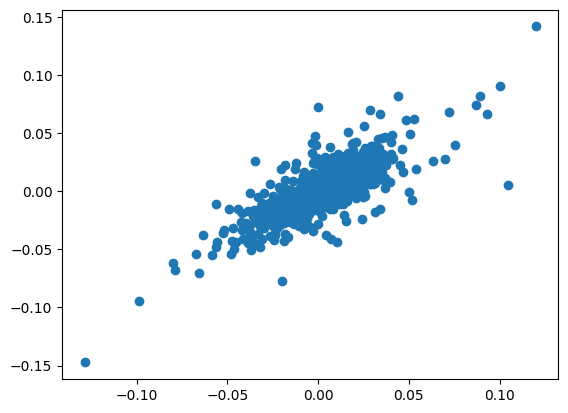

In [ ]:
plt.scatter(returns.iloc[:, 0], returns.iloc[:, 1], label='Original points')


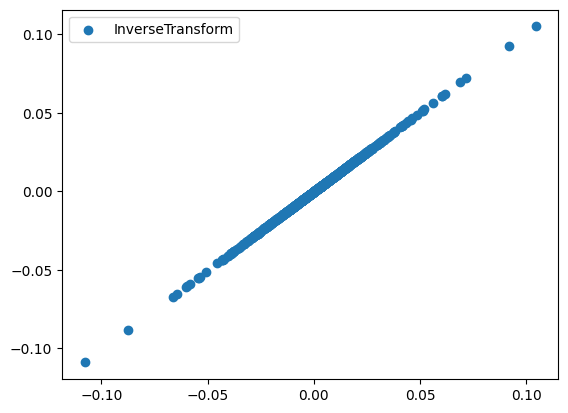

In [ ]:
plt.scatter(dummy[:, 0], dummy[:, 1], label='InverseTransform')

plt.legend()
plt.show()

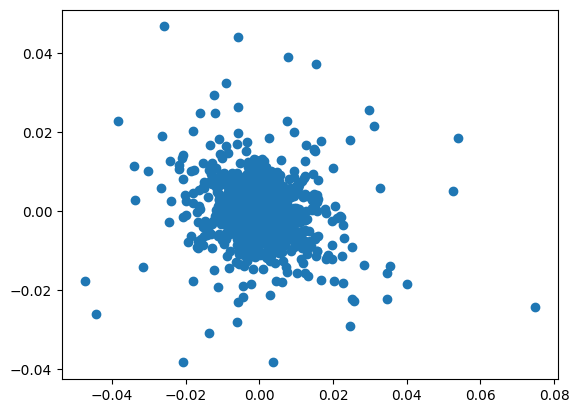

In [ ]:
plt.scatter(diff.iloc[:, 0], diff.iloc[:, 1], label='Original points')

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca1 = PCA(1)
X_orig = np.random.rand(10, 2)
factors = pca1.fit_transform(X_orig)
#print(X_orig)
#print(factors)
#factors.shape
pca1.components_





array([[-0.7225967 , -0.69126985]])

In [ ]:
X_re_orig = pca1.inverse_transform(factors)

X_re_orig

array([[0.82441314, 0.81683566],
       [0.74747014, 0.74322838],
       [0.33397394, 0.34765855],
       [0.81904565, 0.81170088],
       [0.45315664, 0.4616743 ],
       [0.78376818, 0.7779528 ],
       [0.90706567, 0.89590495],
       [0.25439266, 0.27152737],
       [0.3367597 , 0.35032355],
       [0.96867148, 0.95483995]])

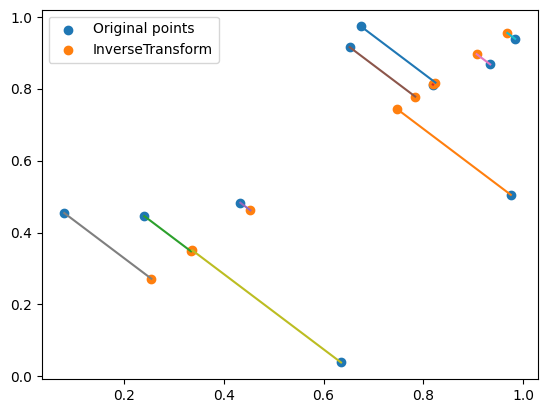

In [ ]:
plt.scatter(X_orig[:, 0], X_orig[:, 1], label='Original points')
plt.scatter(X_re_orig[:, 0], X_re_orig[:, 1], label='InverseTransform')
[plt.plot([X_orig[i, 0], X_re_orig[i, 0]], [X_orig[i, 1], X_re_orig[i, 1]]) for i in range(10)]
plt.legend()
plt.show()

In [ ]:
!pip install finance-datareader

In [ ]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.preprocessing import MinMaxScaler



In [ ]:
import FinanceDataReader as fdr

In [ ]:
# 야후 금융 API를 사용해서 주가 데이터 가져오기
def get_stock_data(stock_name, start_date, end_date):
    #yf.pdr_override()
    #df = pdr.get_data_yahoo(stock_name, start=start_date, end=end_date)
    df = fdr.DataReader(ticker, start=start_date, end=end_date)

    return df

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 1, Train Loss: 15580.233398
Epoch: 2, Train Loss: 11943.371805
Epoch: 3, Train Loss: 8545.561663
Epoch: 4, Train Loss: 6524.602083
Epoch: 5, Train Loss: 5212.904656
Epoch: 6, Train Loss: 4753.024217
Epoch: 7, Train Loss: 4599.788204
Epoch: 8, Train Loss: 4666.437044
Epoch: 9, Train Loss: 4585.880604
Epoch: 10, Train Loss: 4574.610072
Epoch: 11, Train Loss: 4558.259234
Epoch: 12, Train Loss: 4624.927645
Epoch: 13, Train Loss: 4600.990231
Epoch: 14, Train Loss: 4608.856348
Epoch: 15, Train Loss: 4588.399626
Epoch: 16, Train Loss: 4620.202220
Epoch: 17, Train Loss: 4589.011130
Epoch: 18, Train Loss: 4608.828739
Epoch: 19, Train Loss: 4569.107411
Epoch: 20, Train Loss: 4614.137914
Prediction 1: 128.29051208496094
Prediction 2: 128.29051208496094
Prediction 3: 128.29051208496094
Prediction 4: 128.29051208496094
Prediction 5: 128.29051208496094
Prediction 6: 128.29049682617188
Prediction 7: 128.29049682617188
Prediction 8: 128.29049682617188
Prediction 9: 128.29051208496094
Prediction

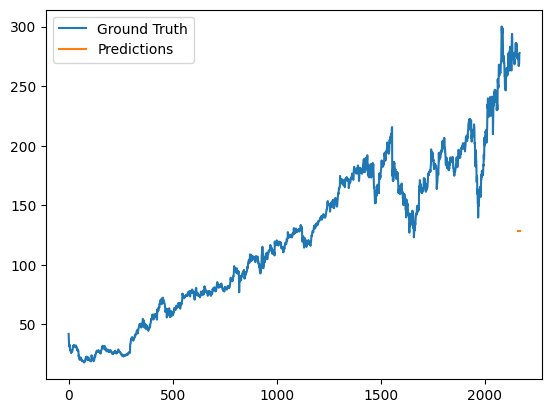

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 전처리
stock_name = "AAPL"
start_date = "2010-01-01"
end_date = "2020-12-31"

data = get_stock_data(stock_name, start_date, end_date)
data = data[['Open']].values.astype('float32')
data = torch.FloatTensor(data)

# 하이퍼파라미터 설정
num_layers = 6
num_heads = 8
hidden_size = 512
dropout = 0.1
num_epochs = 20
batch_size = 32
lr = 0.0005

# Transformer델 정의
class Transformer(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, num_layers, num_heads, dropout):
    super().__init__()
    self.input_embedding = nn.Linear(input_dim, hidden_dim)
    self.transformer = nn.Transformer(d_model=hidden_dim, nhead=num_heads, num_encoder_layers=num_layers, num_decoder_layers=num_layers, dim_feedforward=hidden_dim, dropout=dropout)
    self.output_layer = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.input_embedding(x)
    x = self.transformer(x, x)
    x = self.output_layer(x)
    return x

# 데이터셋과 데이터로더 설정
class StockDataset(Dataset):
    def __init__(self, data, seq_len=20):
        self.data = data
        self.seq_len = seq_len

    def __len__(self):
        return len(self.data) - self.seq_len

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_len]
        y = self.data[idx+self.seq_len]
        return x, y

dataset = StockDataset(data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 모델과 옵티마이저 설정
model = Transformer(input_dim=1, hidden_dim=hidden_size, output_dim=1, num_layers=num_layers, num_heads=num_heads, dropout=dropout)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

# 학습 루프
for epoch in range(num_epochs):
    mse_loss = 0
    for x, y in dataloader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred.squeeze(), y)
        loss.backward()
        optimizer.step()
        mse_loss += loss.item()

    # 학습 결과 출력
    print(f'Epoch: {epoch+1}, Train Loss: {mse_loss/len(dataloader):.6f}')

# 테스트 데이터 예측
model.eval()
with torch.no_grad():
    inputs = data[-20:].view(-1, 1, 1)
    for i in range(10):
        pred = model(inputs)[-1].item()
        inputs = torch.cat([inputs.squeeze(), torch.FloatTensor([pred])]).view(-1, 1, 1)
        print(f'Prediction {i+1}: {pred}')

# 예측 결과 시각화
inputs = data[-20:].view(-1, 1, 1)
predictions = []
for i in range(10):
    pred = model(inputs)[-1].item()
    inputs = torch.cat([inputs.squeeze(), torch.FloatTensor([pred])]).view(-1, 1, 1)
    predictions.append(pred)
plt.plot(data, label='Ground Truth')
plt.plot(range(len(data)-10, len(data)), predictions, label='Predictions')
plt.legend()
plt.show()


In [ ]:


# 데이터 전처리
def preprocess_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

    seq_length = 30
    x = []
    y = []

    for i in range(len(scaled_data) - seq_length):
        x.append(scaled_data[i:i+seq_length])
        y.append(scaled_data[i+seq_length])

    x = np.array(x)
    y = np.array(y)

    train_size = int(0.8 * len(x))
    train_x, test_x = x[:train_size], x[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    return train_x, train_y, test_x, test_y, scaler

In [ ]:

class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])


In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, d_model, nhead, num_layers):
        super().__init__()
        self.transformer = nn.Transformer(d_model, nhead, num_layers)
        self.fc = nn.Linear(d_model, 1)

    def forward(self, x):
        x = self.transformer(x,x)
        x = self.fc(x)
        return x

In [ ]:
def train_model(model, dataloader, loss_function, optimizer, epochs):
    for epoch in range(epochs):
        for x, y in dataloader:
            optimizer.zero_grad()
            y_pred = model.forward(x)
            loss = loss_function(y_pred.view(-1), y.view(-1))
            loss.backward()
            optimizer.step()

In [ ]:
# 주가 데이터 가져오기
stock_name = "AAPL"
start_date = "2010-01-01"
end_date = "2020-12-31"

data = get_stock_data(stock_name, start_date, end_date)

# 데이터 전처리
train_x, train_y, test_x, test_y, scaler = preprocess_data(data)

# 훈련 데이터 불러오기
train_dataset = TimeSeriesDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 모델 생성
device = "cuda" if torch.cuda.is_available() else "cpu"
d_model = 30
nhead = 5
num_layers = 2
model = TransformerModel(d_model, nhead, num_layers).to(device)
model

TransformerModel(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-1): 2 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=30, out_features=30, bias=True)
          )
          (linear1): Linear(in_features=30, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=30, bias=True)
          (norm1): LayerNorm((30,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((30,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
      (norm): LayerNorm((30,), eps=1e-05, elementwise_affine=True)
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
  

In [ ]:
# 손실 함수 및 최적화 도구 생성
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
# 학습
epochs = 10
train_model(model, train_dataloader, loss_function, optimizer, epochs)

RuntimeError: ignored

In [ ]:



# 예측 및 평가
test_x_tensor = torch.tensor(test_x, dtype=torch.float32).to(device)
predictions = model(test_x_tensor).detach().cpu().numpy()
predictions_rescaled = scaler.inverse_transform(predictions)

print("예측된 주가:")
print(predictions_rescaled)


TypeError: ignored

*This cookbook is based off the [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)*

**Goal:** Provide an introductory understanding of the components and use cases of LangChain via [ELI5](https://www.dictionary.com/e/slang/eli5/#:~:text=ELI5%20is%20short%20for%20%E2%80%9CExplain,a%20complicated%20question%20or%20problem.) examples and code snippets. For use cases check out part 2 (coming soon).


**Links:**
* [LC Conceptual Documentation](https://docs.langchain.com/docs/)
* [LC Python Documentation](https://python.langchain.com/en/latest/)
* [LC Javascript/Typescript Documentation](https://js.langchain.com/docs/)
* [LC Discord](https://discord.gg/6adMQxSpJS)
* [www.langchain.com](https://langchain.com/)
* [LC Twitter](https://twitter.com/LangChainAI)


### **What is LangChain?**
> LangChain is a framework for developing applications powered by language models.

**~~TL~~DR**: LangChain makes the complicated parts of working & building with AI models easier. It helps do this in two ways:

1. **Integration** - Bring external data, such as your files, other applications, and api data, to your LLMs
2. **Agency** - Allow your LLMs to interact with it's environment via decision making. Use LLMs to help decide which action to take next

### **Why LangChain?**
1. **Components** - LangChain makes it easy to swap out abstractions and components necessary to work with language models.

2. **Customized Chains** - LangChain provides out of the box support for using and customizing 'chains' - a series of actions strung together.

3. **Speed 🚢** - This team ships insanely fast. You'll be up to date with the latest LLM features.

4. **Community 👥** - Wonderful discord and community support, meet ups, hackathons, etc.

Though LLMs can be straightforward (text-in, text-out) you'll quickly run into friction points that LangChain helps with once you develop more complicated applications.

*Note: This cookbook will not cover all aspects of LangChain. It's contents have been curated to get you to building & impact as quick as possible. For more, please check out [LangChain Conceptual Documentation](https://docs.langchain.com/docs/)*

In [ ]:
openai_api_key='YourAPIKey'

# LangChain Components

## Schema - Nuts and Bolts of working with LLMs

### **Text**
The natural language way to interact with LLMs

In [ ]:
# You'll be working with simple strings (that'll soon grow in complexity!)
my_text = "What day comes after Friday?"

### **Chat Messages**
Like text, but specified with a message type (System, Human, AI)

* **System** - Helpful background context that tell the AI what to do
* **Human** - Messages that are intented to represent the user
* **AI** - Messages that show what the AI responded with

For more, see OpenAI's [documentation](https://platform.openai.com/docs/guides/chat/introduction)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(temperature=.7, openai_api_key=openai_api_key)

In [ ]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

AIMessage(content='You could eat a caprese salad with fresh mozzarella and basil.', additional_kwargs={}, example=False)

You can also pass more chat history w/ responses from the AI

In [ ]:
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

AIMessage(content='While in Nice, you can also explore the charming Old Town and enjoy some delicious Mediterranean cuisine.', additional_kwargs={}, example=False)

### **Documents**
An object that holds a piece of text and metadata (more information about that text)

In [ ]:
from langchain.schema import Document

In [ ]:
Document(page_content="This is my document. It is full of text that I've gathered from other places",
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })

Document(page_content="This is my document. It is full of text that I've gathered from other places", metadata={'my_document_id': 234234, 'my_document_source': 'The LangChain Papers', 'my_document_create_time': 1680013019})

## Models - The interface to the AI brains

###  **Language Model**
A model that does text in ➡️ text out!

*Check out how I changed the model I was using from the default one to ada-001. See more models [here](https://platform.openai.com/docs/models)*

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-ada-001", openai_api_key=openai_api_key)

In [ ]:
llm("What day comes after Friday?")

'\n\nSaturday'

### **Chat Model**
A model that takes a series of messages and returns a message output

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(temperature=1, openai_api_key=openai_api_key)

In [ ]:
chat(
    [
        SystemMessage(content="You are an unhelpful AI bot that makes a joke at whatever the user says"),
        HumanMessage(content="I would like to go to New York, how should I do this?")
    ]
)

AIMessage(content="Well, have you considered using your teleportation powers? Oh, wait, you don't have any? I guess you'll have to settle for an airplane or a really fast pogo stick. Good luck with that!", additional_kwargs={}, example=False)

### **Text Embedding Model**
Change your text into a vector (a series of numbers that hold the semantic 'meaning' of your text). Mainly used when comparing two pieces of text together.

*BTW: Semantic means 'relating to meaning in language or logic.'*

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [ ]:
text = "Hi! It's time for the beach"

In [ ]:
text_embedding = embeddings.embed_query(text)
print (f"Your embedding is length {len(text_embedding)}")
print (f"Here's a sample: {text_embedding[:5]}...")

Your embedding is length 1536
Here's a sample: [-0.00020583387231454253, -0.003205398330464959, -0.0008301587076857686, -0.01946892775595188, -0.015162716619670391]...


## Prompts - Text generally used as instructions to your model

### **Prompt**
What you'll pass to the underlying model

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

# I like to use three double quotation marks for my prompts because it's easier to read
prompt = """
Today is Monday, tomorrow is Wednesday.

What is wrong with that statement?
"""

llm(prompt)

'\nThe statement is incorrect because tomorrow is Tuesday, not Wednesday.'

### **Prompt Template**
An object that helps create prompts based on a combination of user input, other non-static information and a fixed template string.

Think of it as an [f-string](https://realpython.com/python-f-strings/) in python but for prompts

In [ ]:
from langchain.llms import OpenAI
from langchain import PromptTemplate

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

# Notice "location" below, that is a placeholder for another value later
template = """
I really want to travel to {location}. What should I do there?

Respond in one short sentence
"""

prompt = PromptTemplate(
    input_variables=["location"],
    template=template,
)

final_prompt = prompt.format(location='Rome')

print (f"Final Prompt: {final_prompt}")
print ("-----------")
print (f"LLM Output: {llm(final_prompt)}")

Final Prompt: 
I really want to travel to Rome. What should I do there?

Respond in one short sentence

-----------
LLM Output: 
Explore the Colosseum, the Roman Forum, the Pantheon, and the Trevi Fountain.


### **Example Selectors**
An easy way to select from a series of examples that allow you to dynamic place in-context information into your prompt. Often used when your task is nuanced or you have a large list of examples.

Check out different types of example selectors [here](https://python.langchain.com/docs/modules/model_io/prompts/example_selectors/)

If you want an overview on why examples are important (prompt engineering), check out [this video](https://www.youtube.com/watch?v=dOxUroR57xs)

In [ ]:
from langchain.prompts.example_selector import SemanticSimilarityExampleSelector
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.prompts import FewShotPromptTemplate, PromptTemplate
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

example_prompt = PromptTemplate(
    input_variables=["input", "output"],
    template="Example Input: {input}\nExample Output: {output}",
)

# Examples of locations that nouns are found
examples = [
    {"input": "pirate", "output": "ship"},
    {"input": "pilot", "output": "plane"},
    {"input": "driver", "output": "car"},
    {"input": "tree", "output": "ground"},
    {"input": "bird", "output": "nest"},
]

In [ ]:
# SemanticSimilarityExampleSelector will select examples that are similar to your input by semantic meaning

example_selector = SemanticSimilarityExampleSelector.from_examples(
    # This is the list of examples available to select from.
    examples,

    # This is the embedding class used to produce embeddings which are used to measure semantic similarity.
    OpenAIEmbeddings(openai_api_key=openai_api_key),

    # This is the VectorStore class that is used to store the embeddings and do a similarity search over.
    FAISS,

    # This is the number of examples to produce.
    k=2
)

In [ ]:
similar_prompt = FewShotPromptTemplate(
    # The object that will help select examples
    example_selector=example_selector,

    # Your prompt
    example_prompt=example_prompt,

    # Customizations that will be added to the top and bottom of your prompt
    prefix="Give the location an item is usually found in",
    suffix="Input: {noun}\nOutput:",

    # What inputs your prompt will receive
    input_variables=["noun"],
)

In [ ]:
# Select a noun!
my_noun = "student"

print(similar_prompt.format(noun=my_noun))

Give the location an item is usually found in

Example Input: driver
Example Output: car

Example Input: pilot
Example Output: plane

Input: student
Output:


In [ ]:
llm(similar_prompt.format(noun=my_noun))

' classroom'

### **Output Parsers**
A helpful way to format the output of a model. Usually used for structured output.

Two big concepts:

**1. Format Instructions** - A autogenerated prompt that tells the LLM how to format it's response based off your desired result

**2. Parser** - A method which will extract your model's text output into a desired structure (usually json)

In [ ]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate
from langchain.llms import OpenAI

In [ ]:
llm = OpenAI(model_name="text-davinci-003", openai_api_key=openai_api_key)

In [ ]:
# How you would like your response structured. This is basically a fancy prompt template
response_schemas = [
    ResponseSchema(name="bad_string", description="This a poorly formatted user input string"),
    ResponseSchema(name="good_string", description="This is your response, a reformatted response")
]

# How you would like to parse your output
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [ ]:
# See the prompt template you created for formatting
format_instructions = output_parser.get_format_instructions()
print (format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "\`\`\`json" and "\`\`\`":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```


In [ ]:
template = """
You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

{format_instructions}

% USER INPUT:
{user_input}

YOUR RESPONSE:
"""

prompt = PromptTemplate(
    input_variables=["user_input"],
    partial_variables={"format_instructions": format_instructions},
    template=template
)

promptValue = prompt.format(user_input="welcom to califonya!")

print(promptValue)


You will be given a poorly formatted string from a user.
Reformat it and make sure all the words are spelled correctly

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "\`\`\`json" and "\`\`\`":

```json
{
	"bad_string": string  // This a poorly formatted user input string
	"good_string": string  // This is your response, a reformatted response
}
```

% USER INPUT:
welcom to califonya!

YOUR RESPONSE:



In [ ]:
llm_output = llm(promptValue)
llm_output

'```json\n{\n\t"bad_string": "welcom to califonya!",\n\t"good_string": "Welcome to California!"\n}\n```'

In [ ]:
output_parser.parse(llm_output)

{'bad_string': 'welcom to califonya!', 'good_string': 'Welcome to California!'}

## Indexes - Structuring documents to LLMs can work with them

### **Document Loaders**
Easy ways to import data from other sources. Shared functionality with [OpenAI Plugins](https://openai.com/blog/chatgpt-plugins) [specifically retrieval plugins](https://github.com/openai/chatgpt-retrieval-plugin)

See a [big list](https://python.langchain.com/en/latest/modules/indexes/document_loaders.html) of document loaders here. A bunch more on [Llama Index](https://llamahub.ai/) as well.

In [ ]:
from langchain.document_loaders import HNLoader

In [ ]:
loader = HNLoader("https://news.ycombinator.com/item?id=34422627")

In [ ]:
data = loader.load()

In [ ]:
print (f"Found {len(data)} comments")
print (f"Here's a sample:\n\n{''.join([x.page_content[:150] for x in data[:2]])}")

Found 76 comments
Here's a sample:

Ozzie_osman 3 months ago  
             | next [–] 

LangChain is awesome. For people not sure what it's doing, large language models (LLMs) are very Ozzie_osman 3 months ago  
             | parent | next [–] 

Also, another library to check out is GPT Index (https://github.com/jerryjliu/gpt_index)


### **Text Splitters**
Often times your document is too long (like a book) for your LLM. You need to split it up into chunks. Text splitters help with this.

There are many ways you could split your text into chunks, experiment with [different ones](https://python.langchain.com/en/latest/modules/indexes/text_splitters.html) to see which is best for you.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
# This is a long document we can split up.
with open('data/PaulGrahamEssays/worked.txt') as f:
    pg_work = f.read()

print (f"You have {len([pg_work])} document")

You have 1 document


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 150,
    chunk_overlap  = 20,
)

texts = text_splitter.create_documents([pg_work])

In [ ]:
print (f"You have {len(texts)} documents")

You have 606 documents


In [ ]:
print ("Preview:")
print (texts[0].page_content, "\n")
print (texts[1].page_content)

Preview:
February 2021Before college the two main things I worked on, outside of school,
were writing and programming. I didn't write essays. I wrote what 

beginning writers were supposed to write then, and probably still
are: short stories. My stories were awful. They had hardly any plot,


### **Retrievers**
Easy way to combine documents with language models.

There are many different types of retrievers, the most widely supported is the VectoreStoreRetriever

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/PaulGrahamEssays/worked.txt')
documents = loader.load()

In [ ]:
# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

# Embedd your texts
db = FAISS.from_documents(texts, embeddings)

In [ ]:
# Init your retriever. Asking for just 1 document back
retriever = db.as_retriever()

In [ ]:
retriever

VectorStoreRetriever(vectorstore=<langchain.vectorstores.faiss.FAISS object at 0x7f8a68be6820>, search_type='similarity', search_kwargs={})

In [ ]:
docs = retriever.get_relevant_documents("what types of things did the author want to build?")

In [ ]:
print("\n\n".join([x.page_content[:200] for x in docs[:2]]))

standards; what was the point? No one else wanted one either, so
off they went. That was what happened to systems work.I wanted not just to build things, but to build things that would
last.In this di

much of it in grad school.Computer Science is an uneasy alliance between two halves, theory
and systems. The theory people prove things, and the systems people
build things. I wanted to build things. 


### **VectorStores**
Databases to store vectors. Most popular ones are [Pinecone](https://www.pinecone.io/) & [Weaviate](https://weaviate.io/). More examples on OpenAIs [retriever documentation](https://github.com/openai/chatgpt-retrieval-plugin#choosing-a-vector-database). [Chroma](https://www.trychroma.com/) & [FAISS](https://engineering.fb.com/2017/03/29/data-infrastructure/faiss-a-library-for-efficient-similarity-search/) are easy to work with locally.

Conceptually, think of them as tables w/ a column for embeddings (vectors) and a column for metadata.

Example

| Embedding      | Metadata |
| ----------- | ----------- |
| [-0.00015641732898075134, -0.003165106289088726, ...]      | {'date' : '1/2/23}       |
| [-0.00035465431654651654, 1.4654131651654516546, ...]   | {'date' : '1/3/23}        |

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

loader = TextLoader('data/PaulGrahamEssays/worked.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# Get embedding engine ready
embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)

In [ ]:
print (f"You have {len(texts)} documents")

You have 78 documents


In [ ]:
embedding_list = embeddings.embed_documents([text.page_content for text in texts])

In [ ]:
print (f"You have {len(embedding_list)} embeddings")
print (f"Here's a sample of one: {embedding_list[0][:3]}...")

You have 78 embeddings
Here's a sample of one: [-0.0011257503838977907, -0.011114791224843646, -0.012860921430454107]...


Your vectorstore store your embeddings (☝️) and make them easily searchable

## Memory
Helping LLMs remember information.

Memory is a bit of a loose term. It could be as simple as remembering information you've chatted about in the past or more complicated information retrieval.

We'll keep it towards the Chat Message use case. This would be used for chat bots.

There are many types of memory, explore [the documentation](https://python.langchain.com/en/latest/modules/memory/how_to_guides.html) to see which one fits your use case.

### Chat Message History

In [ ]:
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(temperature=0, openai_api_key=openai_api_key)

history = ChatMessageHistory()

history.add_ai_message("hi!")

history.add_user_message("what is the capital of france?")

In [ ]:
history.messages

[AIMessage(content='hi!', additional_kwargs={}, example=False),
 HumanMessage(content='what is the capital of france?', additional_kwargs={}, example=False)]

In [ ]:
ai_response = chat(history.messages)
ai_response

AIMessage(content='The capital of France is Paris.', additional_kwargs={}, example=False)

In [ ]:
history.add_ai_message(ai_response.content)
history.messages

[AIMessage(content='hi!', additional_kwargs={}, example=False),
 HumanMessage(content='what is the capital of france?', additional_kwargs={}, example=False),
 AIMessage(content='The capital of France is Paris.', additional_kwargs={}, example=False)]

## Chains ⛓️⛓️⛓️
Combining different LLM calls and action automatically

Ex: Summary #1, Summary #2, Summary #3 > Final Summary

Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo&t=2s) explaining different summarization chain types

There are [many applications of chains](https://python.langchain.com/en/latest/modules/chains/how_to_guides.html) search to see which are best for your use case.

We'll cover two of them:

### 1. Simple Sequential Chains

Easy chains where you can use the output of an LLM as an input into another. Good for breaking up tasks (and keeping your LLM focused)

In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

llm = OpenAI(temperature=1, openai_api_key=openai_api_key)

In [ ]:
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# Holds my 'location' chain
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [ ]:
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# Holds my 'meal' chain
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [ ]:
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)

In [ ]:
review = overall_chain.run("Rome")



> Entering new SimpleSequentialChain chain...
A classic dish from Rome is Spaghetti alla Carbonara. This dish is a creamy pasta made with eggs, cured pork, Pecorino Romano cheese, black pepper, and Olive oil.
1. Bring a large pot of salted water to a boil.
2. Add about a pound of spaghetti noodles and cook for 8-10 minutes, stirring occasionally.
3. Drain noodles and set aside.
4. In a separate bowl, whisk together 2 eggs and ½ cup of Pecorino Romano cheese.
5. In a large skillet, heat 2 tablespoons of olive oil over medium heat.
6. Add 4 ounces of cubed pancetta or guanciale and cook until lightly browned, stirring often.
7. Reduce heat to low and add the spaghetti noodles.
8. Pour the egg mixture over the noodles and vigorously stir together.
9. Remove from heat, stir in a pinch of black pepper and serve.

> Finished chain.


### 2. Summarization Chain

Easily run through long numerous documents and get a summary. Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo) for other chain types besides map-reduce

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = TextLoader('data/PaulGrahamEssays/disc.txt')
documents = loader.load()

# Get your splitter ready
text_splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=50)

# Split your docs into texts
texts = text_splitter.split_documents(documents)

# There is a lot of complexity hidden in this one line. I encourage you to check out the video above for more detail
chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
chain.run(texts)



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"January 2017Because biographies of famous scientists tend to 
edit out their mistakes, we underestimate the 
degree of risk they were willing to take.
And because anything a famous scientist did that
wasn't a mistake has probably now become the
conventional wisdom, those choices don't
seem risky either.Biographies of Newton, for example, understandably focus
more on physics than alchemy or theology.
The impression we get is that his unerring judgment
led him straight to truths no one else had noticed.
How to explain all the time he spent on alchemy
and theology?  Well, smart people are often kind of
crazy.But maybe there is a simpler explanation. Maybe"


CONCISE SUMMARY:
Prompt after formatting:
Write a concise summary of the following:


"the smartness and the craziness were not as separate
as we think. Physics seems to us a promis

" Biographies of famous scientists do not include the risks and mistakes taken when exploring unproven topics such as alchemy and theology, leading to an unbalanced view. Newton took a risk by exploring all three of these topics, and it paid off in success with physics. Despite the current view that alchemy and theology are a waste of time, Newton's decision shows that once they were regarded equally as important."

## Agents 🤖🤖

Official LangChain Documentation describes agents perfectly (emphasis mine):
> Some applications will require not just a predetermined chain of calls to LLMs/other tools, but potentially an **unknown chain** that depends on the user's input. In these types of chains, there is a “agent” which has access to a suite of tools. Depending on the user input, the agent can then **decide which, if any, of these tools to call**.


Basically you use the LLM not just for text output, but also for decision making. The coolness and power of this functionality can't be overstated enough.

Sam Altman emphasizes that the LLMs are good '[reasoning engine](https://www.youtube.com/watch?v=L_Guz73e6fw&t=867s)'. Agent take advantage of this.

### Agents

The language model that drives decision making.

More specifically, an agent takes in an input and returns a response corresponding to an action to take along with an action input. You can see different types of agents (which are better for different use cases) [here](https://python.langchain.com/en/latest/modules/agents/agents/agent_types.html).

### Tools

A 'capability' of an agent. This is an abstraction on top of a function that makes it easy for LLMs (and agents) to interact with it. Ex: Google search.

This area shares commonalities with [OpenAI plugins](https://platform.openai.com/docs/plugins/introduction).

### Toolkit

Groups of tools that your agent can select from

Let's bring them all together:

In [ ]:
from langchain.agents import load_tools
from langchain.agents import initialize_agent
from langchain.llms import OpenAI
import json

llm = OpenAI(temperature=0, openai_api_key=openai_api_key)

In [ ]:
serpapi_api_key='...'

In [ ]:
toolkit = load_tools(["serpapi"], llm=llm, serpapi_api_key=serpapi_api_key)

In [ ]:
agent = initialize_agent(toolkit, llm, agent="zero-shot-react-description", verbose=True, return_intermediate_steps=True)

In [ ]:
response = agent({"input":"what was the first album of the"
                    "band that Natalie Bergman is a part of?"})



> Entering new AgentExecutor chain...
 I should try to find out what band Natalie Bergman is a part of.
Action: Search
Action Input: "Natalie Bergman band"
Observation: Natalie Bergman is an American singer-songwriter. She is one half of the duo Wild Belle, along with her brother Elliot Bergman. Her debut solo album, Mercy, was released on Third Man Records on May 7, 2021. She is based in Los Angeles.
Thought: I should search for the debut album of Wild Belle.
Action: Search
Action Input: "Wild Belle debut album"
Observation: Isles
Thought: I now know the final answer.
Final Answer: Isles is the debut album of Wild Belle, the band that Natalie Bergman is a part of.

> Finished chain.


In [ ]:
print(json.dumps(response["intermediate_steps"], indent=2))

[
  [
    [
      "Search",
      "Natalie Bergman band",
      " I should try to find out what band Natalie Bergman is a part of.\nAction: Search\nAction Input: \"Natalie Bergman band\""
    ],
    "Natalie Bergman is an American singer-songwriter. She is one half of the duo Wild Belle, along with her brother Elliot Bergman. Her debut solo album, Mercy, was released on Third Man Records on May 7, 2021. She is based in Los Angeles."
  ],
  [
    [
      "Search",
      "Wild Belle debut album",
      " I should search for the debut album of Wild Belle.\nAction: Search\nAction Input: \"Wild Belle debut album\""
    ],
    "Isles"
  ]
]


![Wild Belle](https://github.com/abeliansw/langchain-tutorials/blob/main/data/WildBelle1.png?raw=1)

🎵Enjoy🎵
https://open.spotify.com/track/1eREJIBdqeCcqNCB1pbz7w?si=c014293b63c7478c